## TP 1
### Objetivo
El objetivo del primer TP es realizar un análisis exploratorio del set de datos del TP. Queremos ver qué cosas podemos descubrir sobre los datos que puedan resultar interesantes. Los requisitos de la primera entrega son los siguientes:

 - El análisis debe estar hecho en Python Pandas o R.
 - El análisis debe entregarse en formato papel en una carpeta en donde se incluya el reporte completo y todas las visualizaciones generadas. Es altamente recomendable que las visualizaciones se impriman en color.
 - Informar el link a un repositorio Github en donde pueda bajarse el código completo para generar el análisis.
 - Agregar en Kaggle un kernel con el análisis exploratorio realizado.
 
### Evaluación

 - Originalidad del análisis exploratorio. 
 - Calidad del reporte. ¿Está bien escrito? ¿Es claro y preciso? 
 - Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma se responden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada? 
 #### Calidad de las visualizaciones presentadas.
 - ¿Tienen todos los ejes su rótulo?
 - ¿Tiene cada visualización un título?
 - ¿Es entendible la visualización sin tener que leer la explicación?
 - ¿El tipo de plot elegido es adecuado para lo que se quiere visualizar?
 - ¿Es una visualización interesante?
 - ¿El uso del color es adecuado?
 - ¿Hay un exceso o falta de elementos visuales en la visualización elegida?
 - ¿La visualización es consistente con los datos?
#### Conclusiones presentadas.
 - ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base al análisis realizado? ¿Es interesante?
 - ¿Pudieron descubrir features en el campo ‘model’? ¿Cuales fueron?
 - ¿Identificaron patrones o funnels de usuarios que realizan checkouts/conversiones en Trocafone? 
 - ¿Se comportan de forma distinta dependiendo del tipo de dispositivo desde el cual acceden?
 - ¿Se comportan de forma distinta dependiendo del tipo de fuente de tráfico al que pertenecen?
 - ¿Realizaron algún análisis sobre búsquedas que realizan los usuarios y las keywords que utilizan apoyándose en algún tipo de visualización?
 - ¿Realizaron algún análisis de lugar donde se originan las visitas de los usuarios de Trocafone (a nivel país, regiones más importantes o ciudades más importantes) apoyándose en algún tipo de visualización?
 - ¿Pudieron descubrir features jerarquizando información de alguno de los campos (por ejemplo “screen_resolution”)?
 - ¿El análisis realiza un aporte a Trocafone?




## MACHINE LEARNING

In [123]:
import numpy as np  # Librería para aplicar álgebra lineal
import pandas as pd # Para manejar los datos (datasets)

import matplotlib.pyplot as plt # Para las visualizaciones
import seaborn as sns # Visualizaciones más fancy

from sklearn import preprocessing # Para el procesador de los datos
from sklearn.preprocessing import Imputer # Para adoptar una estrategia para los missing values
from sklearn.preprocessing import LabelEncoder as Codificar # Para codificar variables categóricas
from sklearn.preprocessing import OneHotEncoder # Para pasar el LaberEncoder vector a OneHot matriz
from sklearn.preprocessing import MinMaxScaler # Para realizar el escalado en escala (0-1)
from sklearn.model_selection import train_test_split as Separar # Para dividir en los 2 conjuntos
#from statsmodels.tools.eval_measures import rmse # Para calcular el error
from sklearn.metrics import confusion_matrix as CM # Para construir la matriz de confusión
from matplotlib.colors import ListedColormap as Colors # Para pintar las regiones en Clasificación

In [124]:
#Se especifican los tipo de datos para mejorar la performance
eventos = pd.read_csv('../TP2018/fiuba-trocafone-tp2-final-set/events_up_to_01062018.csv', 
                      dtype={"timestamp": object,#intenté hacerla datetime y no anduvo 
                             "event": 'category',
                             "person":object,
                             "url":object,
                             "sku":object,
                             "model":object,
                             "condition":'category',
                             "storage":object,
                             "color":'category',
                             "skus":object,
                             "search_term":object,
                             "staticpage":object,
                             "campaign_source":object,
                             "search_engine":object,
                             "channel":object,
                             "new_vs_returning":'category',
                             "city":object,
                             "region":object,
                             "country":object,
                             "device_type":object,
                             "screen_resolution":object,
                             "operating_system_version":object,
                             "browser_version":object})
etiquetas = pd.read_csv('../TP2018/fiuba-trocafone-tp2-final-set/labels_training_set.csv',
                        dtype={"person":object, "label":bool})

In [125]:
etiquetas['label'].value_counts()

False    18434
True       980
Name: label, dtype: int64

In [126]:
eventos.head(3)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-18 00:11:27,viewed product,ad93850f,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-18 00:11:16,viewed product,0297fc1e,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
len(eventos['person'].unique()) - len(etiquetas)

19415

In [128]:
print(etiquetas['label'].value_counts())
print(etiquetas['label'].value_counts(normalize=True))

False    18434
True       980
Name: label, dtype: int64
False    0.949521
True     0.050479
Name: label, dtype: float64


In [129]:
eventos['timestamp'] =  pd.to_datetime(eventos['timestamp'])
eventos[['marca','modelo']] = eventos['model'].dropna().str.split(' ',n=1,expand=True)
eventos['weekday']=eventos['timestamp'].dt.day_name()
eventos['hour']=eventos['timestamp'].dt.hour
eventos['month']=eventos['timestamp'].dt.month
eventos['day']=eventos['timestamp'].dt.day

In [130]:
print('Cantidad de meses distintos:',len(eventos['month'].value_counts()))
eventos['month'].value_counts()

Cantidad de meses distintos: 5


5    1713920
4     309849
3     193790
2      73541
1      50581
Name: month, dtype: int64

In [131]:
eventos.groupby('person')['month'].value_counts().unstack().reset_index().fillna(0).head()

month,person,1,2,3,4,5
0,0008ed71,0.0,0.0,0.0,0.0,6.0
1,00091926,0.0,0.0,0.0,0.0,448.0
2,00091a7a,0.0,0.0,10.0,0.0,0.0
3,000ba417,0.0,0.0,0.0,0.0,206.0
4,000c79fe,0.0,0.0,0.0,0.0,17.0


In [132]:
mesesGrp = eventos.groupby('person')['month'].value_counts().unstack().reset_index()
mesesGrp.rename({1:'total_enero',2:'total_febrero',3:'total_marzo',4:'total_abril',5:'total_mayo'},inplace=True, axis=1)
print('Cantidad de elementos de mesesGrp:',len(mesesGrp))
mesesGrp.head(3)

Cantidad de elementos de mesesGrp: 38829


month,person,total_enero,total_febrero,total_marzo,total_abril,total_mayo
0,0008ed71,NaN,NaN,NaN,NaN,6.0
1,00091926,NaN,NaN,NaN,NaN,448.0
2,00091a7a,NaN,NaN,10.0,NaN,NaN


In [133]:
eventosGrp  = eventos.groupby('person')['event'].value_counts().unstack().reset_index()
eventosGrp.columns = eventosGrp.columns.map(lambda x: x if x == 'person' else 'total ' + x)
print('Cantidad de elementos de eventosGrp:',len(eventosGrp))
eventosGrp.head(3)

Cantidad de elementos de eventosGrp: 38829


event,person,total ad campaign hit,total brand listing,total checkout,total conversion,total generic listing,total lead,total search engine hit,total searched products,total staticpage,total viewed product,total visited site
0,0008ed71,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0
1,00091926,15.0,25.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,372.0,34.0
2,00091a7a,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0


In [134]:
#Agrupamos los primeros features, de mes y evento
clientesGrp = pd.merge(eventosGrp,mesesGrp,on='person')
print('Cantidad de elementos de clientesGrp:',len(clientesGrp))
clientesGrp.head()

Cantidad de elementos de clientesGrp: 38829


,person,total ad campaign hit,total brand listing,total checkout,total conversion,total generic listing,total lead,total search engine hit,total searched products,total staticpage,total viewed product,total visited site,total_enero,total_febrero,total_marzo,total_abril,total_mayo
0,0008ed71,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,6.0
1,00091926,15.0,25.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,372.0,34.0,NaN,NaN,NaN,NaN,448.0
2,00091a7a,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,10.0,NaN,NaN
3,000ba417,1.0,24.0,6.0,1.0,14.0,NaN,1.0,NaN,NaN,153.0,6.0,NaN,NaN,NaN,NaN,206.0
4,000c79fe,1.0,NaN,1.0,NaN,1.0,NaN,1.0,9.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,17.0


In [135]:
marcasGrp = eventos.groupby('person')['marca'].value_counts().unstack().reset_index()
marcasGrp.columns = marcasGrp.columns.map(lambda x: x if x == 'person' else 'total marca ' + x)
marcasGrp.head(3)

marca,person,total marca Asus,total marca LG,total marca Lenovo,total marca Motorola,total marca Outros,total marca Quantum,total marca Samsung,total marca Sony,total marca Xiaomi,total marca iPad,total marca iPhone
0,0008ed71,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
1,00091926,NaN,2.0,1.0,55.0,NaN,NaN,61.0,1.0,NaN,1.0,253.0
2,00091a7a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [136]:
#A los features ya obtenidos le agregamos las marcas de los modelos consultados. Importante el left join!
clientesGrp = clientesGrp.merge(marcasGrp,on='person',how='left').fillna(0)
clientesGrp.head(2)

,person,total ad campaign hit,total brand listing,total checkout,total conversion,total generic listing,total lead,total search engine hit,total searched products,total staticpage,...,total marca LG,total marca Lenovo,total marca Motorola,total marca Outros,total marca Quantum,total marca Samsung,total marca Sony,total marca Xiaomi,total marca iPad,total marca iPhone
0,0008ed71,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,00091926,15.0,25.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,55.0,0.0,0.0,61.0,1.0,0.0,1.0,253.0


## kNN - k Vecinos más cercanos
El algortimo kNN categoriza los puntos en función de la clase a la que pertenecen sus vecinos más cercanos. Toma una distancia (lineal por ejemplo) a un conjunto de vecinos en un radio delimitado, y compara cual es la clase predominante para convertirse en uno más de esa clase

In [137]:
#1. Cargamos X e y para trabajar con KNN
X = pd.merge(clientesGrp,etiquetas,on='person')
X.drop("person", axis=1, inplace=True)
X = X.fillna(0)

from sklearn import preprocessing

xArray = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xArray)
X = pd.DataFrame(x_scaled)

y = X.pop(27)
X.head(1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.045455,0.0,0.002128,0.0,0.0,0.0,0.0,0.0,...,0.006579,0.0,0.0,0.0,0.0,0.000957,0.0,0.0,0.0,0.000484


In [138]:
# 2 Utilizar el Separador
X_train, X_test, y_train, y_test = Separar(X, y, test_size=0.25)

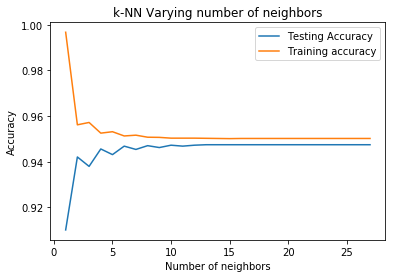

In [140]:
# 3 Ajustar Knn para entrenamiento
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,28)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    #Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [141]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(X_train,y_train)

#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.9379892871858261

In [142]:
clientesAEvaluar = pd.read_csv('../TP2018/fiuba-trocafone-tp2-final-set/trocafone_kaggle_test.csv')
print(len(clientesAEvaluar))
clientesAEvaluar.head(2)
datosTest = clientesAEvaluar.merge(clientesGrp, on='person',how='inner')
print('cantidad de datos:',len(datosTest))

person = datosTest['person'];

datosTest.drop("person", axis=1, inplace=True)
datosTest = datosTest.fillna(0)
xArray = datosTest.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xArray)
datosTest = pd.DataFrame(x_scaled)

datosTest['person'] = person;


datosTest.head(2)

19415
cantidad de datos: 19415


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,person
0,0.0000,0.000000,0.005076,0.0,0.003745,0.000000,0.001312,0.001577,0.0,0.002092,...,0.0,0.0,0.0,0.0,0.004955,0.0,0.0,0.00000,0.000000,4886f805
1,0.0725,0.002972,0.035533,0.0,0.078652,0.026316,0.000000,0.009464,0.0,0.211297,...,0.0,0.0,0.0,0.0,0.001982,0.0,0.0,0.03876,0.257798,0297fc1e


In [143]:
final_pred = knn.predict(X=datosTest.drop('person', axis=1).fillna(0))
final_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [144]:
final_pred.size

19415

In [145]:
clientesAEvaluar['label'] = pd.Series(final_pred, index=clientesAEvaluar.index)
clientesAEvaluar.head()

,person,label
0,4886f805,0.0
1,0297fc1e,0.0
2,2d681dd8,0.0
3,cccea85e,0.0
4,4c8a8b93,0.0


In [146]:
#Exportamos el archivo a subir. De esta manera tiene el formato correcto. 
#Notar que así lo deja en el directorio de la notebook
clientesAEvaluar.to_csv('entrega_2.csv',index=False)


Da 0.50644 de puntaje.

# SVM - Support Vector Machines
Los SVM utilizan la misma técnica de función de mapeo para llevar los datos a un espacio de mayor dimensión donde los datos sean linealmente separables por un plano, que divida nuestros datos por categorías.

In [147]:
#Cargamos X e y para trabajar con KNN
X = pd.merge(clientesGrp,etiquetas,on='person')
X.drop("person", axis=1, inplace=True)
X = X.fillna(0)

from sklearn import preprocessing

xArray = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xArray)
X = pd.DataFrame(x_scaled)

y = X.pop(27)
X.head(1)




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.045455,0.0,0.002128,0.0,0.0,0.0,0.0,0.0,...,0.006579,0.0,0.0,0.0,0.0,0.000957,0.0,0.0,0.0,0.000484


In [148]:
# 3. Utilizar el Separador
X_train, X_test, y_train, y_test = Separar(X, y, test_size=0.25)
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (14560, 27)
X_test:  (4854, 27)
y_train:  (14560,)
y_test:  (4854,)


In [195]:
# 4. Entrenar
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [196]:
# 5.1 Preparo datos de testing
clientesAEvaluar = pd.read_csv('../TP2018/fiuba-trocafone-tp2-final-set/trocafone_kaggle_test.csv')
datosTest = clientesAEvaluar.merge(clientesGrp, on='person',how='inner')
person = datosTest['person'];

datosTest.drop("person", axis=1, inplace=True)
datosTest = datosTest.fillna(0)
xArray = datosTest.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xArray)
datosTest = pd.DataFrame(x_scaled)

datosTest['person'] = person;
datosTest.head(2)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,person
0,0.0000,0.000000,0.005076,0.0,0.003745,0.000000,0.001312,0.001577,0.0,0.002092,...,0.0,0.0,0.0,0.0,0.004955,0.0,0.0,0.00000,0.000000,4886f805
1,0.0725,0.002972,0.035533,0.0,0.078652,0.026316,0.000000,0.009464,0.0,0.211297,...,0.0,0.0,0.0,0.0,0.001982,0.0,0.0,0.03876,0.257798,0297fc1e


In [197]:
# 5.2 Evaluar predicción
y_pred = svclassifier.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[4614    0]
 [ 240    0]]
             precision    recall  f1-score   support

        0.0       0.95      1.00      0.97      4614
        1.0       0.00      0.00      0.00       240

avg / total       0.90      0.95      0.93      4854



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [198]:
# 6. Hacer las predicciones
y_pred = svclassifier.predict(X=datosTest.drop('person', axis=1).fillna(0))

In [199]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [200]:
clientesAEvaluar['label'] = pd.Series(y_pred, index=clientesAEvaluar.index)
clientesAEvaluar.head()

,person,label
0,4886f805,0.0
1,0297fc1e,0.0
2,2d681dd8,0.0
3,cccea85e,0.0
4,4c8a8b93,0.0


El resultado es falso en todos los casos.
Una causa probable es el hecho de que no está afinando el modelo. 
Habría que encontrar buenos C y γ. En este caso, los valores predeterminados resultan ser malos, lo que conduce a modelos triviales que siempre dan una cierta clase.

In [201]:
#Exportamos el archivo a subir. De esta manera tiene el formato correcto. 
#Notar que así lo deja en el directorio de la notebook
clientesAEvaluar.to_csv('entrega_2.csv',index=False)


# Regresión Logística
La regresión logísitica es un modelo que puede predecir la probabilidad que tiene una variable binaria (que puede aceptar 2 valores) de pertenecer a una clase o a otra. Es por tanto un método utilizado para la clasificación categórica de variables, especialmente útil por su simplicidad e interpretabilidad

## Escenario del problema
Queremos encontrar la relación que existe entre el evento de compra y el color.

In [202]:
#Cargamos X e y para trabajar con KNN
X = pd.merge(clientesGrp,etiquetas,on='person')
X.drop("person", axis=1, inplace=True)
X = X.fillna(0)

from sklearn import preprocessing

xArray = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xArray)
X = pd.DataFrame(x_scaled)

y = X.pop(27)
X.head(1)




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.045455,0.0,0.002128,0.0,0.0,0.0,0.0,0.0,...,0.006579,0.0,0.0,0.0,0.0,0.000957,0.0,0.0,0.0,0.000484


In [203]:
# 3. Utilizar el Separador
X_train, X_test, y_train, y_test = Separar(X, y, test_size=0.25)
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (14560, 27)
X_test:  (4854, 27)
y_train:  (14560,)
y_test:  (4854,)


In [205]:
from sklearn.linear_model import LogisticRegression as LR
clasificador_log = LR()
clasificador_log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [211]:
# 6. Hacer las predicciones
y_pred = clasificador_log.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [212]:
# 5.1 Preparo datos de testing
clientesAEvaluar = pd.read_csv('../TP2018/fiuba-trocafone-tp2-final-set/trocafone_kaggle_test.csv')
datosTest = clientesAEvaluar.merge(clientesGrp, on='person',how='inner')
person = datosTest['person'];

datosTest.drop("person", axis=1, inplace=True)
datosTest = datosTest.fillna(0)
xArray = datosTest.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xArray)
datosTest = pd.DataFrame(x_scaled)

datosTest['person'] = person;
datosTest.head(2)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,person
0,0.0000,0.000000,0.005076,0.0,0.003745,0.000000,0.001312,0.001577,0.0,0.002092,...,0.0,0.0,0.0,0.0,0.004955,0.0,0.0,0.00000,0.000000,4886f805
1,0.0725,0.002972,0.035533,0.0,0.078652,0.026316,0.000000,0.009464,0.0,0.211297,...,0.0,0.0,0.0,0.0,0.001982,0.0,0.0,0.03876,0.257798,0297fc1e


In [217]:
# 7. Analizar los resultados
y_pred = clasificador_log.predict((datosTest.drop('person', axis=1).fillna(0)))
clientesAEvaluar['label'] = pd.Series(y_pred, index=clientesAEvaluar.index)
clientesAEvaluar.head()

,person,label
0,4886f805,0.0
1,0297fc1e,0.0
2,2d681dd8,0.0
3,cccea85e,0.0
4,4c8a8b93,0.0


Damos cuenta que la Regresión Logística no puede separar las probabilidades de compra de no-compra. está overfitteando.